# [详解Java的自动装箱与拆箱(autoboxing and unboxing)](https://www.cnblogs.com/wang-yaz/p/8516151.html)

## 为什么需要包装类
很多人会有疑问，既然Java中为了提高效率，提供了八种基本数据类型，为什么还要提供包装类呢？

这个问题，其实前面已经有了答案，因为Java是一种面向对象语言，很多地方都需要使用对象而不是基本数据类型。比如，在集合类中，我们是无法将int 、double等类型放进去的。因为集合的容器要求元素是Object类型。

为了让基本类型也具有对象的特征，就出现了包装类型，它相当于将基本类型“包装起来”，使得它具有了对象的性质，并且为其添加了属性和方法，丰富了基本类型的操作。

## 自动装箱拆箱 

基本数据类型的自动装箱(autoboxing)、拆箱(unboxing)是自J2SE 5.0开始提供的功能。

**装箱就是自动将基本数据类型转换为包装器类型。**  
**拆箱就是自动将包装器类型转换为基本数据类型。**

装箱拆箱的类型有：
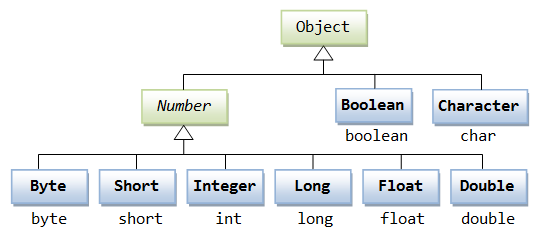

下面两句代码可以看到装箱和拆箱过程：

In [2]:
Integer integer=1; //装箱
int i=integer;     //拆箱

// test
System.out.println(integer);
System.out.println(i)

1
1


对以上代码进行反编译后可以得到以下代码：

In [3]:
Integer integer=Integer.valueOf(1); 
int i=integer.intValue();

// test
System.out.println(integer);
System.out.println(i)

1
1


从上面反编译后的代码可以看出，`int`的自动装箱都是通过`Integer.valueOf()`方法来实现的，`Integer`的自动拆箱都是通过`integer.intValue`来实现的。如果读者感兴趣，可以试着将八种类型都反编译一遍 ，你会发现以下规律：

```
自动装箱都是通过包装类的valueOf()方法来实现的.自动拆箱都是通过包装类对象的xxxValue()来实现的。
```

## 哪些地方会自动拆装箱
解过原理之后，在来看一下，什么情况下，Java会帮我们进行自动拆装箱。前面提到的变量的初始化和赋值的场景就不介绍了，那是最简单的也最容易理解的。

主要来看一下，那些可能被忽略的场景。

### 场景一、将基本数据类型放入集合类
Java中的集合类只能接收对象类型

In [9]:
List<Integer> list = new ArrayList<>();
for (int i = 1; i < 10; i ++){
    list.add(i);
}

#### 补充：集合遍历操作的三种方式
1. Iterator迭代器方式
2. 增强for循环
3. 普通for循环

In [10]:
// 遍历
//1.Iterator迭代器方式
Iterator iterator = list.iterator();
while(iterator.hasNext()){
    System.out.println(iterator.next());
}

//2.增强for循环
for(Object obj:list){
    System.out.println(obj);
}

//3.普通for循环
for(int i=0;i<list.size();i++){
    System.out.println(list.get(i));
}

1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9


将上面初始化代码进行反编译，可以得到以下代码：

In [11]:
List<Integer> list = new ArrayList<>();
for (int i = 1; i < 10; i += 2){
    list.add(Integer.valueOf(i));
}

以上，我们可以得出结论，当我们把基本数据类型放入集合类中的时候，会进行自动装箱。

### 场景二、包装类型和基本类型的大小比较
有没有人想过，当我们对Integer对象与基本类型进行大小比较的时候，实际上比较的是什么内容呢？看以下代码：

In [12]:
Integer a=1;
System.out.println(a==1?"等于":"不等于");
Boolean bool=false;
System.out.println(bool?"真":"假");

等于
假


对以上代码进行反编译，得到以下代码：

In [16]:
Integer a=1;
System.out.println(a.intValue()==1?"等于":"不等于");
Boolean bool=false;
System.out.println(bool.booleanValue()?"真":"假");

等于
假


可以看到，包装类与基本数据类型进行比较运算，是先将包装类进行拆箱成基本数据类型，然后进行比较的。

### 场景三、包装类型的运算
有没有人想过，当我们对Integer对象进行四则运算的时候，是如何进行的呢？看以下代码：

In [17]:
Integer i = 10;
Integer j = 20;
 
System.out.println(i+j);

30


反编译后代码如下：

In [18]:
Integer i = Integer.valueOf(10);
Integer j = Integer.valueOf(20);
System.out.println(i.intValue() + j.intValue());

30


我们发现，两个包装类型之间的运算，会被自动拆箱成基本类型进行。

### 场景四、三目运算符的使用
这是很多人不知道的一个场景，看一个简单的三目运算符的代码：

In [23]:
boolean flag = false;
Integer i = 1;
int j = 0;
int k = flag ? i : j;

// test
System.out.println(k);

0


很多人不知道，其实在int k = flag ? i : j;这一行，会发生自动拆箱。反编译后代码如下：

In [20]:
boolean flag = true;
Integer i = Integer.valueOf(1);
int j = 0;
int k = flag ? i.intValue() : j;

这其实是三目运算符的语法规范：当第二，第三位操作数分别为基本类型和对象时，其中的对象就会拆箱为基本类型进行操作。

因为例子中，flag ? i : j;片段中，第二段的i是一个包装类型的对象，而第三段的j是一个基本类型，所以会对包装类进行自动拆箱。如果这个时候i的值为null，那么久会发生NPE。（[自动拆箱导致空指针异常](https://mp.weixin.qq.com/s?__biz=MzI3NzE0NjcwMg==&mid=2650121204&idx=1&sn=3083f0bff6fac7c208037a90dfcce07d&chksm=f36bbed5c41c37c37284b45f7d1f52440a29377b84cbbde9796d648220665458ed638ff6d996&scene=21#wechat_redirect)）

#### 补充：NPE(Null Pointer Exception)空指针异常

In [24]:
Map<String, Boolean> map = new HashMap<>();
Boolean b = map != null ? map.get("test") : false;
System.out.println(b);

EvalException: null

以上这段代码，是我们在不注意的情况下有可能经常会写的一类代码（在很多时候我们都爱使用三目运算符）。

一般情况下，我们会认为以上代码Boolean b的最终得到的值应该是null。因为map.get("test")的值是null，而b又是一个对象，所以得到结果会是null。

但是，以上代码会抛出NPE：
`java.lang.NullPointerException: null`

首先可以明确的是，既然报了空指针，那么一定是有些地方调用了一个null的对象的某些方法。在这短短的两行代码中，看上去只有一处方法调用`map.get("test")`，但是我们也都是知道，map已经事先初始化过了，不会是Null，那么到底是哪里有空指针呢。

我们接下来反编译一下该代码。看看我们写的代码在经过编译器处理之后变成了什么样。反编译后代码如下：

In [25]:
Map map = new HashMap();
Boolean b = Boolean.valueOf(map == null ? false : ((Boolean)map.get("test")).booleanValue());
System.out.println(b);

EvalException: null

看完这段反编译之后的代码之后，经过分析我们大概可以知道问题出在哪里。((Boolean)hashmap.get("test")).booleanValue() 的执行过程及结果如下：
```java
hashmap.get("test")->null;
(Boolean)null->null;
null.booleanValue()->报错
```
好，问题终于定位到了。很明显，上面源代码中的map.get("test")在被编译成了
(Boolean)map.get("test").booleanValue()，这是一种自动拆箱的操作。

#### 原理分析
通过查看反编译之后的代码，我们准确的定位到了问题，分析之后我们可以得出这样的结论：NPE的原因应该是三目运算符和自动拆箱导致了空指针异常。

那么，这段代码为什么会自动拆箱呢？这其实是三目运算符的语法规范。参见jls-15.25，摘要如下：
```
If the second and third operands have the same type (which may be the null type), then that is the type of the conditional expression.

If one of the second and third operands is of primitive type T, and the type of the other is the result of applying boxing conversion (§5.1.7) to T, then the type of the conditional expression is T.

If one of the second and third operands is of the null type and the type of the other is a reference type, then the type of the conditional expression is that reference type.
```
所以，结果就是：由于使用了三目运算符，并且第二、第三位操作数分别是基本类型和对象。所以对对象进行拆箱操作，由于该对象为null，所以在拆箱过程中调用null.booleanValue()的时候就报了NPE。

#### 问题解决

In [35]:
Map<String,Boolean> map =  new HashMap<String, Boolean>();
Boolean b = (map!=null ? map.get("test") : Boolean.FALSE);
System.out.println(b);

map.put("test",true);
Boolean b = (map!=null ? map.get("test") : Boolean.FALSE);
System.out.println(b);

null
true


就是保证了三目运算符的第二第三位操作数都为对象类型。这样就不会发生自动拆箱操作，以上代码得到的b的结果为null。

PS：本文中的示例，只是为了更加方便读者理解三目运算符会导致自动拆箱现象，可能在代码中并不会直接这样使用。

### 场景五、函数参数与返回值

In [36]:
//自动拆箱
public int getNum1(Integer num) {
    return num;
}
//自动装箱
public Integer getNum2(int num) {
    return num;
}

## 自动拆装箱与缓存
Java SE的自动拆装箱还提供了一个和缓存有关的功能

In [43]:
Integer integer1 = 3;
Integer integer2 = 3;

if (integer1 == integer2)
    System.out.println("integer1 == integer2");
else
    System.out.println("integer1 != integer2");

Integer integer3 = 128;
Integer integer4 = 128;

if (integer3 == integer4)
    System.out.println("integer3 == integer4");
else
    System.out.println("integer3 != integer4");
    
Integer integer5 = 127;
Integer integer6 = 127;

if (integer5 == integer6)
    System.out.println("integer5 == integer6");
else
    System.out.println("integer5 != integer6");

integer1 == integer2
integer3 != integer4
integer5 == integer6


我们普遍认为上面的两个判断的结果都是false。虽然比较的值是相等的，但是由于比较的是对象，而对象的引用不一样，所以会认为两个if判断都是false的。

在Java中，**==比较的是对象应用，而equals比较的是值**。

所以，在这个例子中，不同的对象有不同的引用，所以在进行比较的时候都将返回false。奇怪的是，这里两个类似的if条件判断返回不同的布尔值。

**原因就和Integer中的缓存机制有关。**在Java 5中，在Integer的操作上引入了一个新功能来节省内存和提高性能。**整型对象通过使用相同的对象引用实现了缓存和重用。**
```
适用于整数值区间-128 至 +127。
只适用于自动装箱。使用构造函数创建对象不适用。
```
当需要进行自动装箱时，`如果数字在-128至127之间时，会直接使用缓存中的对象，而不是重新创建一个对象。`

因为这个范围的数字是最被广泛使用的。 在程序中，第一次使用Integer的时候也需要一定的额外时间来初始化这个缓存。

在Boxing Conversion部分的Java语言规范(JLS)规定如下：  
变量p的值是
```
-128至127之间的整数(§3.10.1)
true 和 false的布尔值 (§3.10.3)
‘\u0000’至 ‘\u007f’之间的字符(§3.10.4)
```
范围内的时，将p包装成a和b两个对象时，可以直接使用a==b判断a和b的值是否相等。

### 补充：Java中整型的缓存机制

#### Java中Integer的缓存实现
在Java 5中，在Integer的操作上引入了一个新功能来节省内存和提高性能。整型对象通过使用相同的对象引用实现了缓存和重用。
```
适用于整数值区间-128 至 +127。
只适用于自动装箱。使用构造函数创建对象不适用。
```
Java的编译器把基本数据类型自动转换成封装类对象的过程叫做自动装箱，相当于使用valueOf方法：

In [44]:
Integer a = 10; //this is autoboxing
Integer b = Integer.valueOf(10); //under the hood

现在我们知道了这种机制在源码中哪里使用了，那么接下来我们就看看JDK中的valueOf方法。下面是JDK 1.8.0 build 25的实现：

In [45]:
/**
 * Returns an {@code Integer} instance representing the specified
 * {@code int} value.  If a new {@code Integer} instance is not
 * required, this method should generally be used in preference to
 * the constructor {@link #Integer(int)}, as this method is likely
 * to yield significantly better space and time performance by
 * caching frequently requested values.
 *
 * This method will always cache values in the range -128 to 127,
 * inclusive, and may cache other values outside of this range.
 *
 * @param  i an {@code int} value.
 * @return an {@code Integer} instance representing {@code i}.
 * @since  1.5
 */
public static Integer valueOf(int i) {
    if (i >= IntegerCache.low && i <= IntegerCache.high)
        return IntegerCache.cache[i + (-IntegerCache.low)];
    return new Integer(i);
}

在创建对象之前先从IntegerCache.cache中寻找。如果没找到才使用new新建对象。

#### IntegerCache 类
IntegerCache是Integer类中定义的一个private static的内部类。接下来看看他的定义。

In [46]:
/**
 * Cache to support the object identity semantics of autoboxing for values between
 * -128 and 127 (inclusive) as required by JLS.
 *
 * The cache is initialized on first usage.  The size of the cache
 * may be controlled by the {@code -XX:AutoBoxCacheMax=} option.
 * During VM initialization, java.lang.Integer.IntegerCache.high property
 * may be set and saved in the private system properties in the
 * sun.misc.VM class.
 */

private static class IntegerCache {
    static final int low = -128;
    static final int high;
    static final Integer cache[];

    static {
        // high value may be configured by property
        int h = 127;
        String integerCacheHighPropValue =
            sun.misc.VM.getSavedProperty("java.lang.Integer.IntegerCache.high");
        if (integerCacheHighPropValue != null) {
            try {
                int i = parseInt(integerCacheHighPropValue);
                i = Math.max(i, 127);
                // Maximum array size is Integer.MAX_VALUE
                h = Math.min(i, Integer.MAX_VALUE - (-low) -1);
            } catch( NumberFormatException nfe) {
                // If the property cannot be parsed into an int, ignore it.
            }
        }
        high = h;

        cache = new Integer[(high - low) + 1];
        int j = low;
        for(int k = 0; k < cache.length; k++)
            cache[k] = new Integer(j++);

        // range [-128, 127] must be interned (JLS7 5.1.7)
        assert IntegerCache.high >= 127;
    }

    private IntegerCache() {}
}

CompilationException: 

其中的javadoc详细的说明了缓存支持-128到127之间的自动装箱过程。最大值127可以通过-XX:AutoBoxCacheMax=size修改。 缓存通过一个for循环实现。从低到高并创建尽可能多的整数并存储在一个整数数组中。这个缓存会在Integer类第一次被使用的时候被初始化出来。以后，就可以使用缓存中包含的实例对象，而不是创建一个新的实例(在自动装箱的情况下)。

实际上这个功能在Java 5中引入的时候,范围是固定的-128 至 +127。后来在Java 6中，可以通过java.lang.Integer.IntegerCache.high设置最大值。这使我们可以根据应用程序的实际情况灵活地调整来提高性能。到底是什么原因选择这个-128到127范围呢？因为这个范围的数字是最被广泛使用的。 在程序中，第一次使用Integer的时候也需要一定的额外时间来初始化这个缓存。

#### Java语言规范中的缓存行为
在Boxing Conversion部分的Java语言规范(JLS)规定如下：  
变量p的值是
```
-128至127之间的整数(§3.10.1)
true 和 false的布尔值 (§3.10.3)
‘\u0000’至 ‘\u007f’之间的字符(§3.10.4)
```
范围内的时，将p包装成a和b两个对象时，可以直接使用a==b判断a和b的值是否相等。

#### 其他缓存的对象
这种缓存行为不仅适用于Integer对象。针对所有的整数类型的类都有类似的缓存机制。
- ByteCache用于缓存Byte对象
- ShortCache用于缓存Short对象
- LongCache用于缓存Long对象
- CharacterCache用于缓存Character对象

Byte, Short, Long有固定范围: -128 到 127。对于Character, 范围是 0 到 127。除了Integer以外，范围都不能改变。

## 自动拆装箱带来的问题
当然，自动拆装箱是一个很好的功能，大大节省了开发人员的精力，不再需要关心到底什么时候需要拆装箱。但是，他也会引入一些问题。
1. 包装对象的数值比较，不能简单的使用==，虽然-128到127之间的数字可以，但是这个范围之外还是需要使用equals比较。
2. 前面提到，有些场景会进行自动拆装箱，同时也说过，由于自动拆箱，如果包装类对象为null，那么自动拆箱时就有可能抛出NPE。
3. 如果一个for循环中有大量拆装箱操作，会浪费很多资源。